In [10]:
import pandas as pd
import numpy as np
import pingouin as pg
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import scipy

In [5]:
df_tsk = pd.read_csv('5_task_1.csv')

In [6]:
df_tsk2 = pd.read_csv('5_task_2.csv')

<AxesSubplot:>

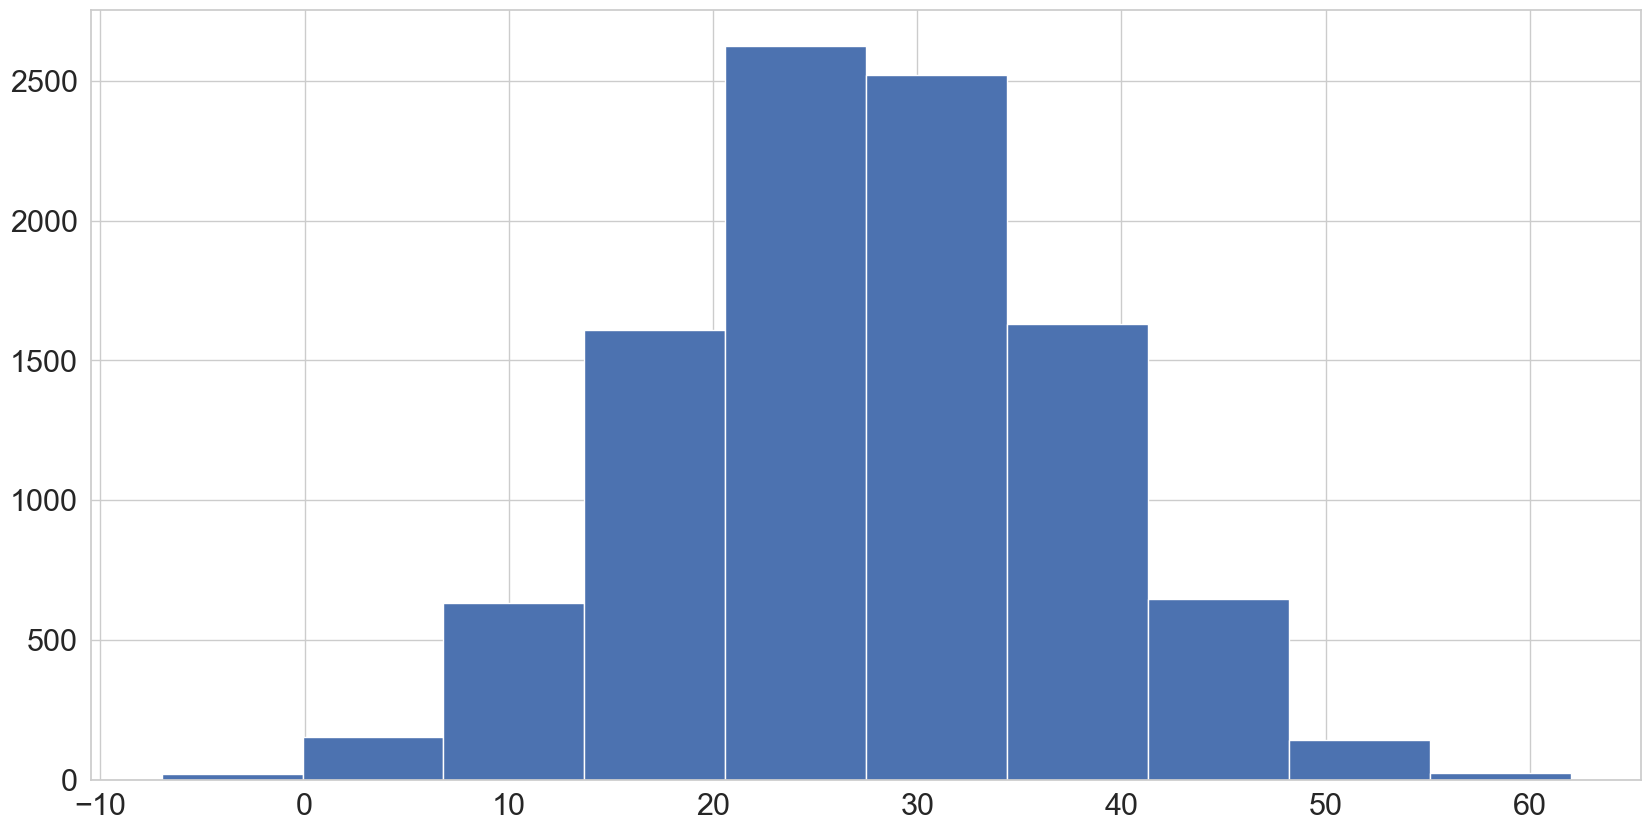

In [40]:
df_tsk[df_tsk.group=='C'].events.hist()

In [11]:
pg.homoscedasticity(df_tsk, dv="events", group="group")

,W,pval,equal_var
levene,2.26226,0.104133,True


In [12]:
pg.normality(data=df_tsk,dv='events',group='group', method='normaltest')

,W,pval,normal
A,2.103460,0.349333,True
B,0.841072,0.656695,True
C,3.243726,0.197530,True


In [13]:
pg.anova(data=df_tsk,dv='events',between='group')

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,29997,2886.166657,0.0,0.161377


In [14]:
pg.pairwise_tukey(data=df_tsk,dv='events', between='group')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140894,-57.021604,0.0,-0.806377
1,A,C,29.5796,27.4703,2.1093,0.140894,14.970833,0.0,0.211712
2,B,C,37.6136,27.4703,10.1433,0.140894,71.992436,0.0,1.018089


In [16]:
df_tsk2.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


In [18]:
sns.set(
font_scale = 2 ,
style = 'whitegrid' ,
rc = {'figure.figsize' : (20,10)})

<AxesSubplot:>

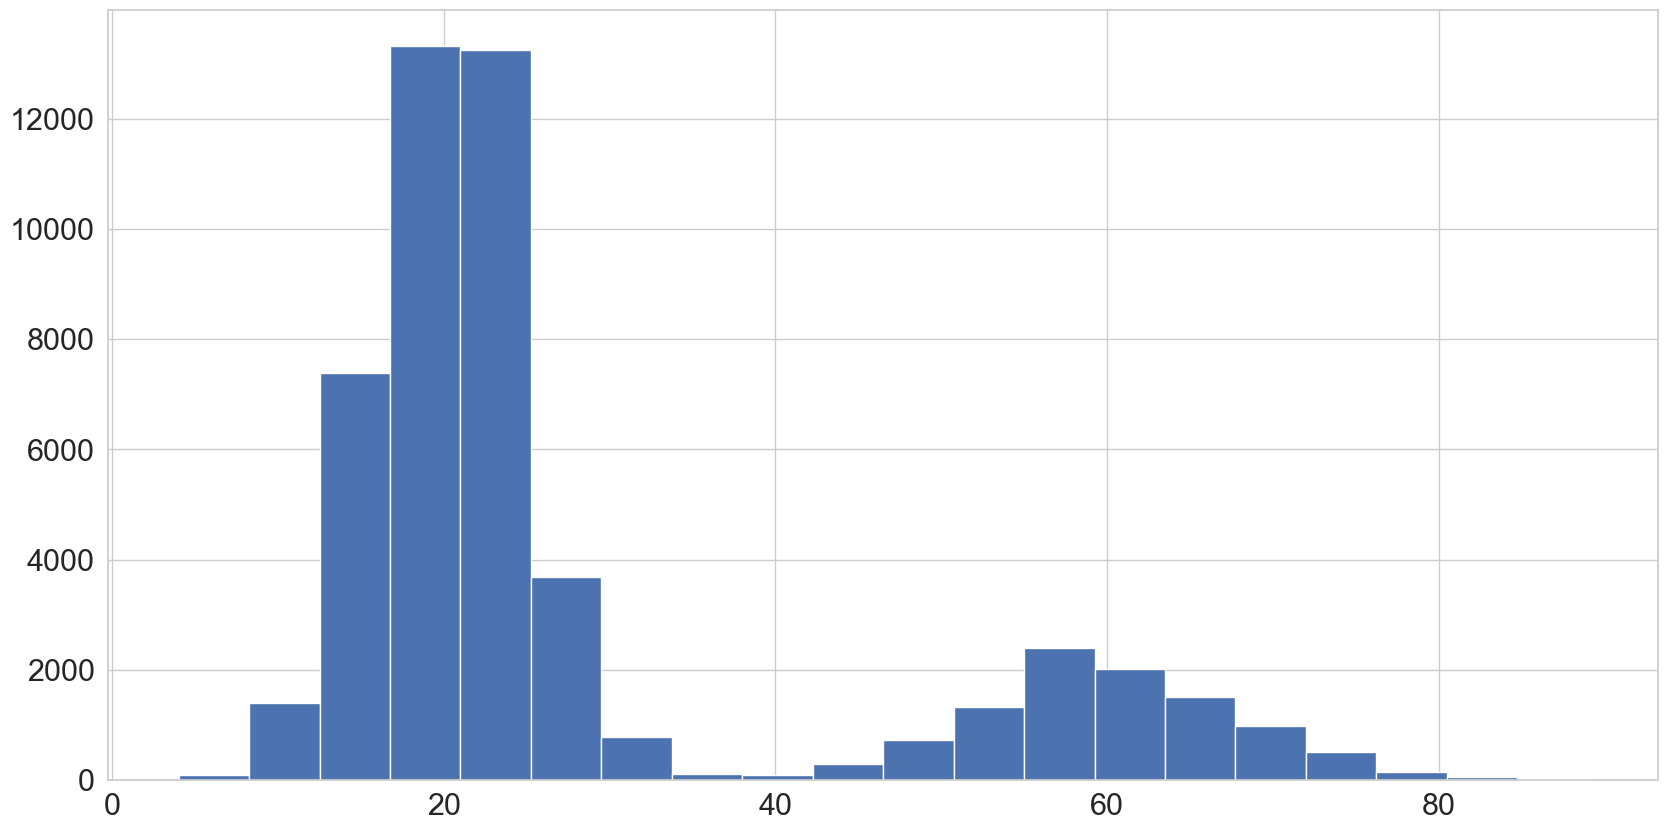

In [20]:
df_tsk2[df_tsk2.group =='control'].events.hist(bins=20)

<AxesSubplot:>

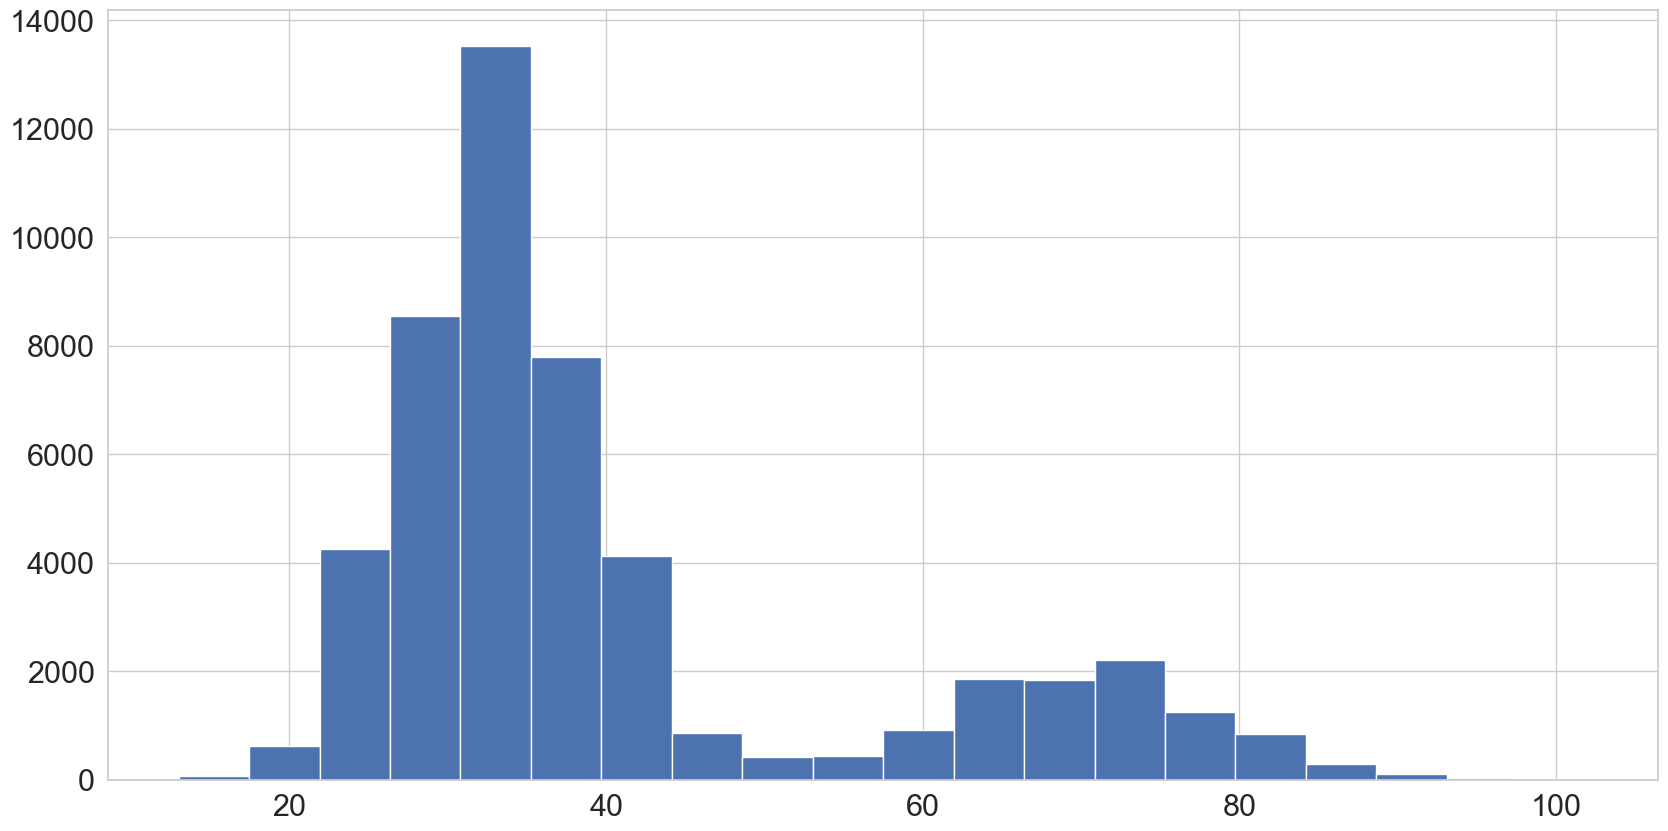

In [22]:
df_tsk2[df_tsk2.group =='test'].events.hist(bins=20)

In [27]:
df_tsk2.groupby(['segment','group']).agg({'events':['median','mean','std']}).round(2)

events             
                median   mean   std
segment group                      
high    control   60.0  59.97  7.81
        test      70.0  69.94  8.40
low     control   20.0  20.03  4.47
        test      33.0  33.03  5.72

In [28]:
pg.anova(data=df_tsk2,dv='events',between=['segment','group'])

,Source,SS,DF,MS,F,p-unc,np2
0,segment,2.362480e+07,1.0,2.362480e+07,689756.377486,0.000000e+00,0.873383
1,group,3.837195e+06,1.0,3.837195e+06,112031.864120,0.000000e+00,0.528383
2,segment * group,3.664244e+04,1.0,3.664244e+04,1069.823273,2.060261e-233,0.010585
3,Residual,3.424956e+06,99996.0,3.425093e+01,NaN,NaN,NaN


In [29]:
df_tsk2.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


In [30]:
df_tsk2['comb'] = df_tsk2['group'] +'//'+ df_tsk2['segment']

In [31]:
df_tsk2.head()

,id,group,segment,events,comb
0,83440,test,high,78.0,test//high
1,96723,test,high,71.0,test//high
2,68719,test,high,80.0,test//high
3,50399,test,high,80.0,test//high
4,95613,test,high,78.0,test//high


In [34]:
pg.pairwise_tukey(data = df_tsk2,dv='events', between='comb')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,control//high,control//low,59.970800,20.031575,39.939225,0.065432,610.391461,0.0,6.824282
1,control//high,test//high,59.970800,69.938500,-9.967700,0.082766,-120.432523,0.0,-1.703109
2,control//high,test//low,59.970800,33.025925,26.944875,0.065432,411.798717,0.0,4.603981
3,control//low,test//high,20.031575,69.938500,-49.906925,0.065432,-762.727892,0.0,-8.527429
4,control//low,test//low,20.031575,33.025925,-12.994350,0.041383,-314.002699,0.0,-2.220314
5,test//high,test//low,69.938500,33.025925,36.912575,0.065432,564.135148,0.0,6.307128
